<a href="https://colab.research.google.com/github/Cyberwhiz77136/Foundations-of-Data-Science/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [6]:
pm10_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [7]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-7-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [8]:
merged_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


In [9]:
pollution_data = merged_data[['pm10','neighborhood']]

In [10]:
pollution_data.shape[0]

118495

In [11]:
merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [12]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [13]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [14]:
pollution_data['pm10'].min()

0.0

In [15]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [16]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [17]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

In [18]:
# Step 1: Randomly sample 10% of the rows without replacement
sample_size = int(joined_table.num_rows * 0.10)  # 10% of total rows
sampled_table = joined_table.sample(k=sample_size, with_replacement=False)

In [44]:
pm_median = percentile(50, joined_table.column('pm10'))
pm_median

3.1400000000000001

In [25]:
# Step 2: Compute the mean pm10 value for this sample
sampled_pm10 = sampled_table.column('pm10')  # Get the 'pm10' values from the sample
sampled_mean_pm10 = np.mean(sampled_pm10)    # Calculate the mean

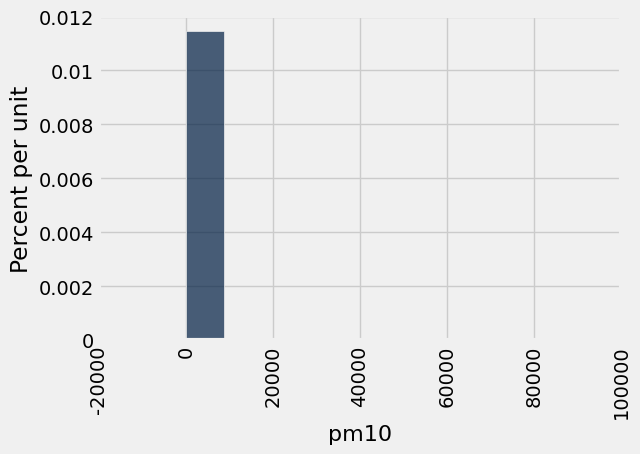

In [26]:
# Step 3: Create an empirical histogram of the pm10 values from the sample using 10 bins
sampled_table.hist('pm10', bins=10)  # Plot histogram for the sample

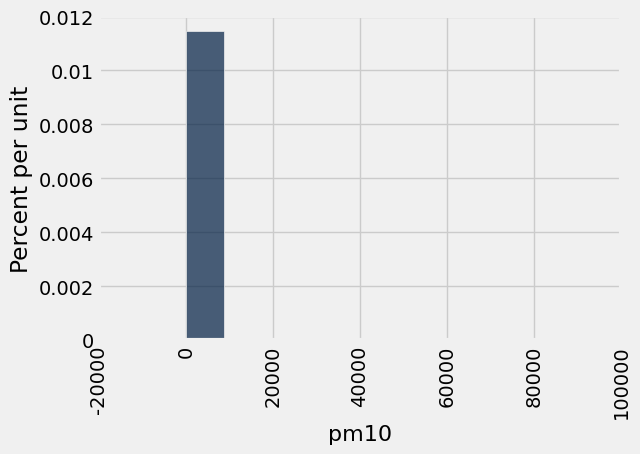

In [27]:
# Step 4: Create an empirical histogram for the full dataset for comparison
joined_table.hist('pm10', bins=10)  # Plot histogram for the full data

Both the sample and full dataset histograms are highly skewed, with most of the pm10 values concentrated close to zero. The sample histogram roughly matches the full dataset but is also quite skewed. In both cases, there are very few or no readings in the higher pm10 ranges. We will compare this histogram with the ones below after removing outliers

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [28]:
joined_table = joined_table.where('pm10', are.below(300))

In [29]:
len(joined_table)

2

In [30]:
joined_table.num_rows

117356

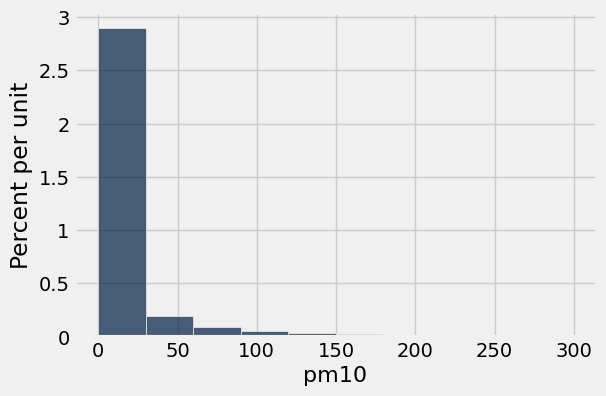

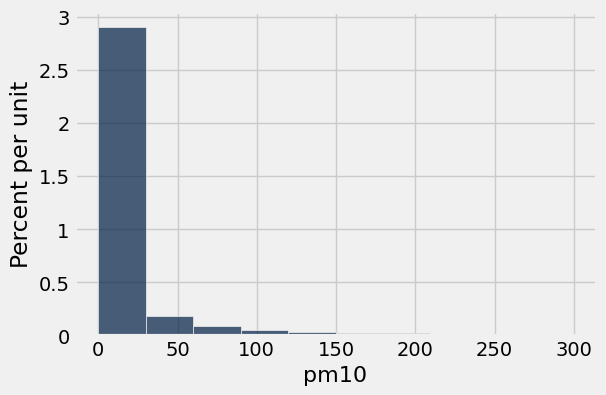

In [35]:
# Step 1: Randomly sample 10% of the rows without replacement
sample_size = int(joined_table.num_rows * 0.10)  # 10% of total rows
sampled_table = joined_table.sample(k=sample_size, with_replacement=False)

# Step 2: Compute the mean pm10 value for this sample
sampled_pm10 = sampled_table.column('pm10')  # Get the 'pm10' values from the sample
sampled_mean_pm10 = np.mean(sampled_pm10)    # Calculate the mean

# Step 3: Create an empirical histogram of the pm10 values from the sample using 10 bins
sampled_table.hist('pm10', bins=10)  # Plot histogram for the sample

# Step 4: Create an empirical histogram for the full dataset for comparison
joined_table.hist('pm10', bins=10)  # Plot histogram for the full data

After removing PM10 outliers above 300 µg/m³, the histograms show a much clearer and more realistic distribution. Most PM10 values are now concentrated between 0 and 50, with a gradual decrease up to around 150. Compared to the original histograms (before removing outliers), the x-axis scale is much smaller and focused, making it easier to see the actual spread of the data. The extreme high values no longer stretch the scale, so the true shape of the distribution is now visible.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [38]:
# Step 1: Define the number of bootstrap samples
num_samples = 5000

# Step 2: Create an empty array to store the medians
bootstrap_medians = make_array()

# Step 3: Run the bootstrap process on the sampled_table (not full data)
for i in np.arange(num_samples):
    # Take a bootstrap sample from the sampled_table (with replacement)
    bootstrap_sample = sampled_table.sample(with_replacement=True)

    # Calculate the median pm10 value of the bootstrap sample
    sample_median = np.median(bootstrap_sample.column('pm10'))

    # Append the sample median to the array
    bootstrap_medians = np.append(bootstrap_medians, sample_median)

95% Confidence Interval for the median pm10: (2.9900000000000002, 3.2599999999999998)


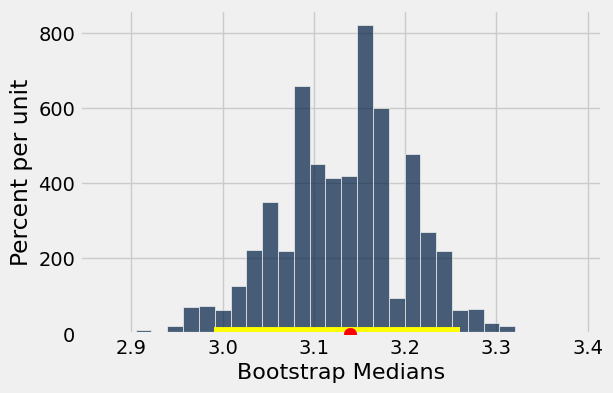

In [50]:
# Step 4: Create a Table to hold the bootstrap medians
bootstrap_table = Table().with_column('Bootstrap Medians', bootstrap_medians)

# Step 5: Plot an empirical histogram of the bootstrap medians
bootstrap_table.hist('Bootstrap Medians', bins=30)

# Step 6: Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)
plt.plot([lower_bound, upper_bound], [0, 0], color='yellow', lw=10, zorder=1)
plt.scatter(pm_median, 0, color='red', s=80, zorder=10);
# Step 7: Print the confidence interval
print('95% Confidence Interval for the median pm10:', (lower_bound, upper_bound))


## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

95% Confidence Interval for the mean pm10 from the sample: (15.550621005538986, 16.888132935662547)


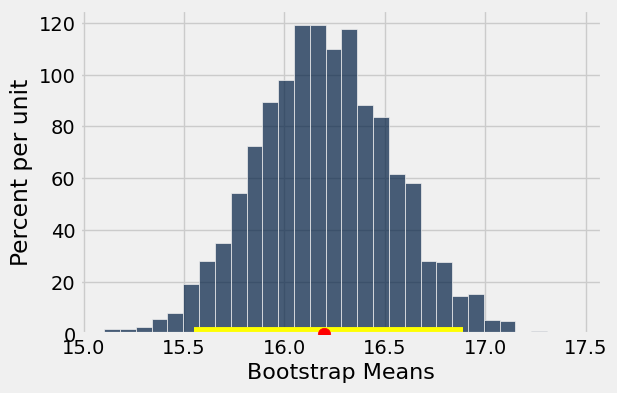

In [51]:
# Step 1: Define the number of bootstrap samples
num_samples = 5000

# Step 2: Create an empty array to store the means
bootstrap_means = make_array()

# Step 3: Run the bootstrap process on the sampled_table
for i in np.arange(num_samples):
    # Take a bootstrap sample from the sampled_table (with replacement)
    bootstrap_sample = sampled_table.sample(with_replacement=True)

    # Calculate the mean pm10 value of the bootstrap sample
    sample_mean = np.mean(bootstrap_sample.column('pm10'))

    # Append the sample mean to the array
    bootstrap_means = np.append(bootstrap_means, sample_mean)

# Step 4: Create a Table to hold the bootstrap means
bootstrap_mean_table = Table().with_column('Bootstrap Means', bootstrap_means)

# Step 5: Plot the histogram of bootstrap means
bootstrap_mean_table.hist('Bootstrap Means', bins=30)

# Step 6: Calculate the 95% confidence interval
lower_bound_mean = np.percentile(bootstrap_means, 2.5)
upper_bound_mean = np.percentile(bootstrap_means, 97.5)

# Step 7: Find the true mean of the sampled data
pm_mean = np.mean(sampled_table.column('pm10'))

# Step 8: Plot the confidence interval and true mean on the histogram
plt.plot([lower_bound_mean, upper_bound_mean], [0, 0], color='yellow', lw=10, zorder=1) # CI line
plt.scatter(pm_mean, 0, color='red', s=80, zorder=10);                                 # True mean point

# Step 9: Print the confidence interval
print('95% Confidence Interval for the mean pm10 from the sample:', (lower_bound_mean, upper_bound_mean))


The 95% confidence interval for the mean PM10 value is (15.56, 16.89) µg/m³.
Since 20 µg/m³ is not contained within this interval, we reject the null hypothesis.
This indicates that the average PM10 level in the sampled population is significantly different from 20 µg/m³.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [52]:
# Step 1: Find the top 3 neighborhoods with highest mean PM10
neighborhood_means = sampled_table.group('neighborhood', np.mean)  # Group and find mean
top3_neighborhoods = neighborhood_means.sort('pm10 mean', descending=True).take(np.arange(3))
top3_names = top3_neighborhoods.column('neighborhood')

print('Top 3 neighborhoods with highest mean PM10:')
print(top3_names)

Top 3 neighborhoods with highest mean PM10:
['Crotona Park' 'Concourse Village' 'Tremont']


In [56]:
# For each of the top 3 neighborhoods, print the number of rows
for neighborhood in top3_names:
    # Filter the sampled_table to only this neighborhood
    neighborhood_data = sampled_table.where('neighborhood', neighborhood)

    # Print the name and the number of rows
    print('Neighborhood:', neighborhood)
    print('Number of rows:', neighborhood_data.num_rows)
    print('---')


Neighborhood: Crotona Park
Number of rows: 10
---
Neighborhood: Concourse Village
Number of rows: 5
---
Neighborhood: Tremont
Number of rows: 19
---


95% Confidence Interval for mean PM10 in Crotona Park : (45.86999999999999, 92.009849999999972)
95% Confidence Interval for mean PM10 in Concourse Village : (20.875999999999998, 95.282000000000011)
95% Confidence Interval for mean PM10 in Tremont : (16.441947368421054, 75.485552631578926)


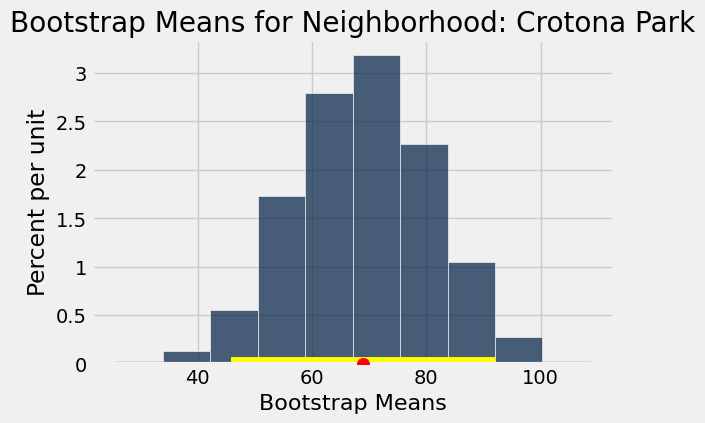

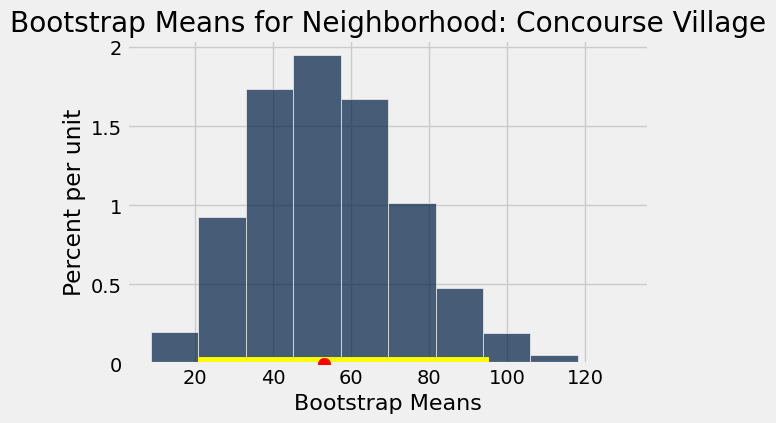

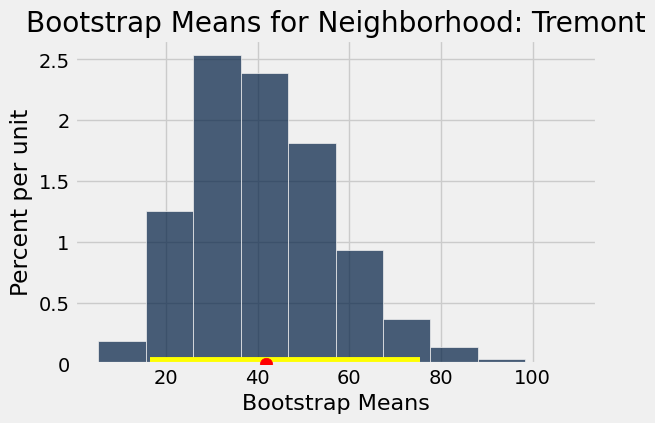

In [57]:
for neighborhood in top3_names:
    # Filter rows for the current neighborhood
    neighborhood_data = sampled_table.where('neighborhood', neighborhood)

    # Create an empty array to store bootstrap means
    bootstrap_means = make_array()

    # Bootstrap 5,000 times
    for i in np.arange(5000):
        sample = neighborhood_data.sample(with_replacement=True)
        sample_mean = np.mean(sample.column('pm10'))
        bootstrap_means = np.append(bootstrap_means, sample_mean)

    # Create a Table with the bootstrap means
    bootstrap_table = Table().with_column('Bootstrap Means', bootstrap_means)

    # Plot the histogram
    bootstrap_table.hist('Bootstrap Means', bins=10)
    plt.title('Bootstrap Means for Neighborhood: ' + neighborhood)

    # Calculate the 95% confidence interval
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)

    # Find the true mean for this neighborhood
    true_mean = np.mean(neighborhood_data.column('pm10'))

    # Plot the confidence interval and true mean
    plt.plot([lower_bound, upper_bound], [0, 0], color='yellow', lw=10, zorder=1)
    plt.scatter(true_mean, 0, color='red', s=80, zorder=10);

    # Print the confidence interval
    print('95% Confidence Interval for mean PM10 in', neighborhood, ':', (lower_bound, upper_bound))

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.